In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

Texas_quality = pd.read_csv("Texas_Qualitylife.csv")

In this code block we extracted Texas counties from the dataset.

In [2]:
quality_Texas = Texas_quality[Texas_quality['LSTATE'].str.contains('TX', case=False, na=False)]
quality_Texas['ULOCALE'].unique()

quality_Texas

,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,Overall Rank,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
1,TXMcmullen County,TX,McMullen County,48311,78072,43-Rural: Remote,NaN,576,47/1000,1.81%,...,105.46%,111.95%,72.03%,90.73%,104.21%,120.05%,127.11%,3,2,87
2,TXTerrell County,TX,Terrell County,48443,79848,43-Rural: Remote,NaN,693,20/1000,3.54%,...,127.10%,135.84%,87.96%,110.73%,125.11%,145.91%,153.79%,12,3,47
7,TXCochran County,TX,Cochran County,48079,79379,43-Rural: Remote,NaN,"2,526",33/1000,5.08%,...,112.29%,121.64%,79.03%,99.96%,114.19%,131.65%,140.54%,41,8,135
8,TXArmstrong County,TX,Armstrong County,48011,79019,42-Rural: Distant,NaN,"1,850",7/1000,2.85%,...,103.99%,110.78%,63.85%,85.75%,98.54%,116.02%,122.96%,16,9,28
9,TXDelta County,TX,Delta County,48119,75469,43-Rural: Remote,NaN,"5,406",6/1000,4.18%,...,108.26%,115.55%,74.63%,94.65%,107.74%,125.03%,132.93%,349,10,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,TXTarrant County,TX,Tarrant County,48439,76118,21-Suburb: Large,NaN,"2,154,595",30/1000,3.74%,...,103.15%,108.74%,62.17%,83.12%,95.65%,113.37%,120.02%,3036,3120,3125
3122,TXBexar County,TX,Bexar County,48029,78109,21-Suburb: Large,NaN,"2,059,530",50/1000,3.84%,...,109.29%,115.61%,66.44%,90.25%,104.20%,122.00%,128.41%,3035,3123,3122
3123,TXHidalgo County,TX,Hidalgo County,48215,78539,12-City: Mid-size,NaN,"888,367",30/1000,6.93%,...,138.74%,148.26%,90.28%,119.83%,138.05%,160.55%,169.30%,3020,3124,3104
3124,TXDallas County,TX,Dallas County,48113,75146,41-Rural: Fringe,NaN,"2,600,840",36/1000,3.85%,...,121.22%,128.02%,73.80%,98.57%,113.73%,133.57%,141.59%,3041,3125,3129


In the block below we identified our 7 features we wanted to use, and adjusted the the rows within the columns of interest to remove any dollar signs or other things that would make the data show up as strings.

In [3]:
features = [
    'Cost of Living',
    'Unemployment',
    '2022 Median Income',
    'WaterQualityVPV',
    'Diversity Rank (Race)',
    'Diversity Rank (Gender)',
    'ULOCALE'
]

quality_Texas['Cost of Living'] = quality_Texas['Cost of Living'].replace({r'[,\$]': ''}, regex=True).astype(float)
quality_Texas['2022 Median Income'] = quality_Texas['2022 Median Income'].replace({r'[,\$]': ''}, regex=True).astype(float)
quality_Texas['Unemployment'] = quality_Texas['Unemployment'].replace({r'[,\%]': ''}, regex=True).astype(float)
quality_Texas['ULOCALE'] = quality_Texas['ULOCALE'].str.replace(r'[\d\-]+', '', regex=True)
quality_Texas['ULOCALE'] = quality_Texas['ULOCALE'].str.strip()



X = quality_Texas[features]


X


/var/folders/m8/1fpvkz014031zsf69k406s0w0000gn/T/ipykernel_11582/299530786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_Texas['Cost of Living'] = quality_Texas['Cost of Living'].replace({r'[,\$]': ''}, regex=True).astype(float)
/var/folders/m8/1fpvkz014031zsf69k406s0w0000gn/T/ipykernel_11582/299530786.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_Texas['2022 Median Income'] = quality_Texas['2022 Median Income'].replace({r'[,\$]': ''}, regex=True).astype(float)
/var/folders/m8/

,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Diversity Rank (Race),Diversity Rank (Gender),ULOCALE
1,63913.28,1.81,67513.81,2,2,87,Rural: Remote
2,64361.02,3.54,55946.62,3,3,47,Rural: Remote
7,61721.15,5.08,59858.82,4,8,135,Rural: Remote
8,73725.97,2.85,81611.11,1,9,28,Rural: Distant
9,62084.03,4.18,63549.24,-1,10,454,Rural: Remote
...,...,...,...,...,...,...,...
3119,72592.42,3.74,82001.30,5,3120,3125,Suburb: Large
3122,66248.04,3.84,69862.16,1,3123,3122,Suburb: Large
3123,56645.44,6.93,45446.29,13,3124,3104,City: Midsize
3124,72227.78,3.85,68960.61,1,3125,3129,Rural: Fringe


In [4]:
X['ULOCALE'].unique()

array(['Rural: Remote', 'Rural: Distant', 'Town: Remote', 'Town: Distant',
       'Rural: Fringe', 'Town: Fringe', 'Suburb: Large', 'City: Small',
       'Suburb: Midsize', 'City: Midsize', 'City: Large'], dtype=object)

In the block below we encoded our area classification data (rural, suburban, etc) so that more urban areas are represented by larger numbers and are therefore more favorable to postgrads. It essentially represents walkability since we are assuming that postgrads would find this more favorable.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


location = ['Rural: Remote', 'Rural: Distant', 'Rural: Fringe', 'Town: Remote', 'Town: Distant', 'Town: Fringe', 'Suburb: Midsize', 'Suburb: Large', 'City: Small', 'City: Midsize', 'City: Large']
ord_features = ['ULOCALE']
ordEnc = OrdinalEncoder(categories = [location])

ordinal_encoder = OrdinalEncoder()
X['ULOCALE'] = ordinal_encoder.fit_transform(X[['ULOCALE']])

coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordinal_encoder, ord_features),   
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(X)


new_feature_names = coltrans.get_feature_names_out()

Texas_encoded = pd.DataFrame(X_trans, columns = new_feature_names)
Texas_encoded


/var/folders/m8/1fpvkz014031zsf69k406s0w0000gn/T/ipykernel_11582/60326765.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ULOCALE'] = ordinal_encoder.fit_transform(X[['ULOCALE']])


,ULOCALE,Cost of Living,Unemployment,2022 Median Income,WaterQualityVPV,Diversity Rank (Race),Diversity Rank (Gender)
0,5.0,63913.28,1.81,67513.81,2.0,2.0,87.0
1,5.0,64361.02,3.54,55946.62,3.0,3.0,47.0
2,5.0,61721.15,5.08,59858.82,4.0,8.0,135.0
3,3.0,73725.97,2.85,81611.11,1.0,9.0,28.0
4,5.0,62084.03,4.18,63549.24,-1.0,10.0,454.0
...,...,...,...,...,...,...,...
248,6.0,72592.42,3.74,82001.30,5.0,3120.0,3125.0
249,6.0,66248.04,3.84,69862.16,1.0,3123.0,3122.0
250,1.0,56645.44,6.93,45446.29,13.0,3124.0,3104.0
251,4.0,72227.78,3.85,68960.61,1.0,3125.0,3129.0


In the block below, we made a new variable including the updated features and adjusted them so that higher numbers represent favorability with respect to all 7 features. We then scaled the features to ensure they have the same weight and that larger scale numbers don't disproportionally affect the results.

In [6]:
new_features = [
    '2022 Median Income', 
    'Cost of Living', 
    'Unemployment', 
    'ULOCALE',
    'WaterQualityVPV',
    'Diversity Rank (Gender)',
    'Diversity Rank (Race)',
]
X_living = Texas_encoded[['2022 Median Income', 'Cost of Living', 'Unemployment', 'ULOCALE', 'WaterQualityVPV', 'Diversity Rank (Gender)', 'Diversity Rank (Race)']].copy()

# Invert the features where lower is better
X_living['Cost of Living'] = -X_living['Cost of Living']
X_living['Unemployment Rate'] = -X_living['Unemployment']
X_living['Diversity Rank (Gender)'] = -X_living['Diversity Rank (Gender)']
X_living['Diversity Rank (Race)'] = -X_living['Diversity Rank (Race)']


X = X_living[new_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)




In the 3 code blocks below we fit and plotted a pca and included the same amount of components as features. We then took a look at which features influence the components the most/least.

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(X_scaled)

pca.components_

array([[-0.47106191,  0.5064517 ,  0.14072854,  0.16472078,  0.08495251,
         0.48882613,  0.4780188 ],
       [-0.3612275 ,  0.26630792,  0.64189729,  0.13562855, -0.07717922,
        -0.4130803 , -0.43769348],
       [-0.13400595,  0.07541205, -0.04420377, -0.43398729,  0.87493298,
        -0.0986257 , -0.10402759],
       [ 0.11371824, -0.0713008 , -0.13793735,  0.8742089 ,  0.43295222,
        -0.06339195, -0.08514861],
       [ 0.3521562 , -0.404523  ,  0.73599051, -0.00879769,  0.18213701,
         0.27702796,  0.24631149],
       [ 0.69922946,  0.70308933,  0.07145656, -0.03824334,  0.02388684,
        -0.0938985 ,  0.02806139],
       [-0.06156378, -0.06198806,  0.01986428,  0.01859703,  0.01125268,
        -0.70079005,  0.70738506]])

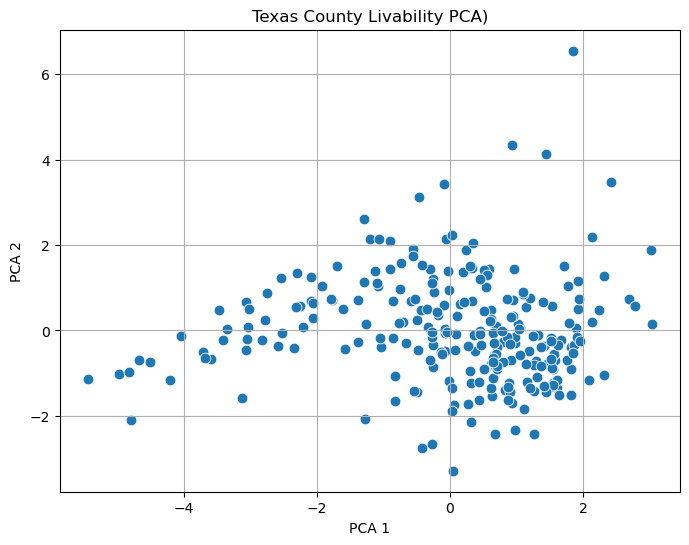

In [59]:
column_names = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(data=pca_data, columns=column_names)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=60)
plt.title('Texas County Livability PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

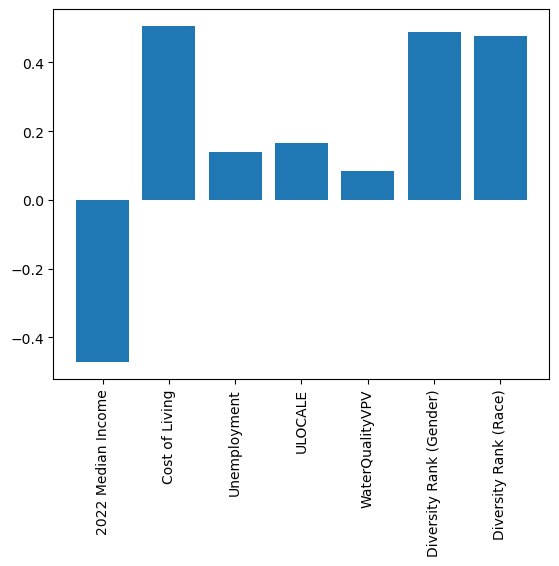

In [60]:
plt.bar(X.columns, pca.components_[0])
plt.xticks(rotation=90)
plt.show()

In the block below we tested some K-means models with different amounts of clusters to determine the ideal amount (best silhouette score). It ended up being ideal to just use 2 clusters.

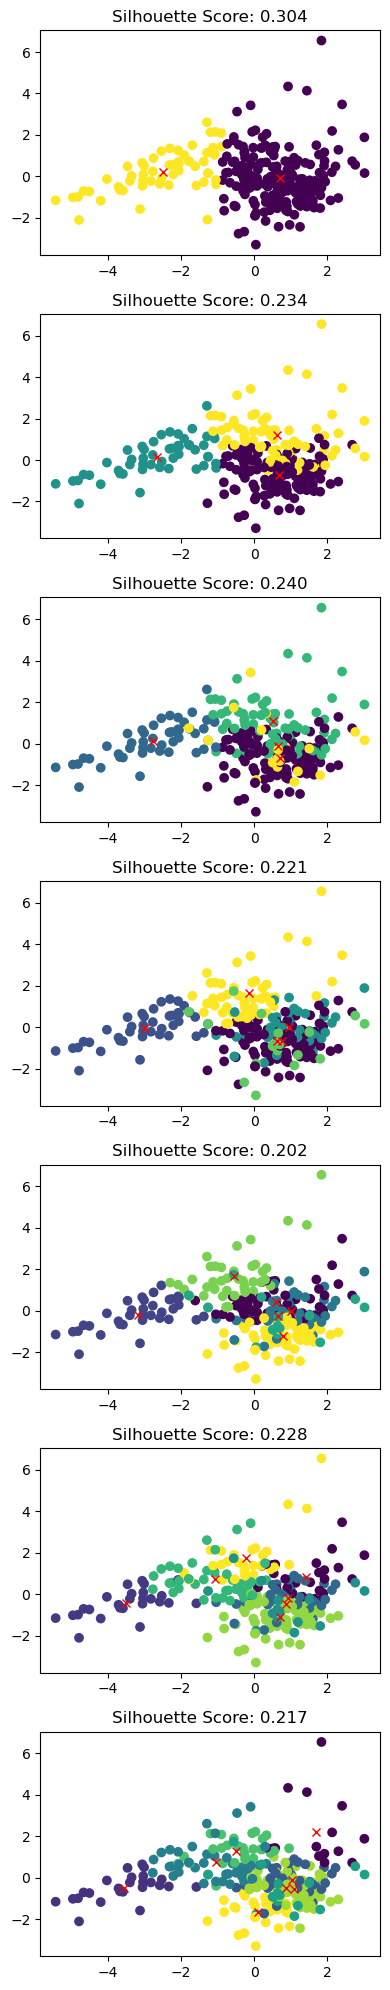

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
n_clusters = [2, 3, 4, 5, 6, 7, 8]  

fig, ax = plt.subplots(len(n_clusters), 1, figsize=(4, 20))

for k, nc in enumerate(n_clusters):
    km = KMeans(n_clusters=nc, random_state=42)
    km.fit(pca_df)  
    labels = km.labels_
    centroids = km.cluster_centers_
    score = silhouette_score(pca_df, labels)
    silhouette_scores.append(score)
    
    ax[k].scatter(pca_df['PC1'], pca_df['PC2'], c=labels)
    ax[k].plot(centroids[:, 0], centroids[:, 1], 'rx')
    ax[k].set_title(f'Silhouette Score: {score:.3f}')
    
plt.tight_layout()
plt.show()

In the block below we plotted a K-means on the pca transformed data with 2 clusters.

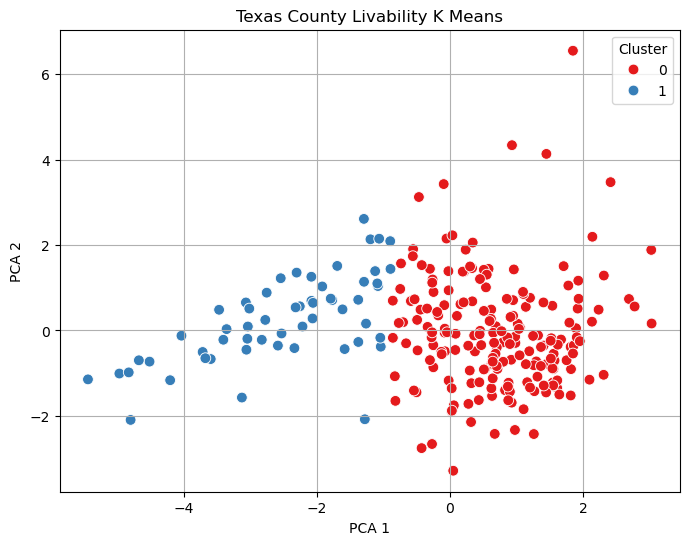

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('Texas County Livability K Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



In the block below, we included another visualization with county labels on each data point to enhance interpretability. Evidently, Starr County scored the highest as the best county in Texas to live in as a recent college graduate.

In [63]:
import plotly.express as px
import pandas as pd


pca_df = pd.DataFrame({
    'PCA1': pca_data[:, 0],
    'PCA2': pca_data[:, 1],
    'County': county_clusters['NMCNTY'],    
    'Cluster': kmeans.labels_
})

fig = px.scatter(
    pca_df,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    hover_data=['County'],   
    title='Texas Counties Interactive (PCA)',
    color_continuous_scale='Viridis' 
)

fig.update_layout(width=950, height=750)  

fig.show()

In [27]:
starr = quality_Texas[quality_Texas['NMCNTY'] == 'Starr County']

starr

,countyhelper,LSTATE,NMCNTY,FIPS,LZIP,ULOCALE,Overall Rank,2022 Population,2016 Crime Rate,Unemployment,...,1p3c,1p4c,2p0c,2p1c,2p2c,2p3c,2p4c,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
2762,TXStarr County,TX,Starr County,48427,78584,Town: Distant,NaN,"65,728",14/1000,12.3,...,177.46%,190.13%,123.36%,156.76%,178.41%,207.10%,218.92%,2337,2763,2318
